# Text mining 
## Lab 01 Multi-Layer Perceptron on Reuters

We are going to train a Neural Network to predict the origin of a document coming from the 20newsgroup dataset.

For this puprose we'll use Keras, and sklearn. Your job is to fill in the missing code into the cells below.

You will find the steps you need to perform in the **Task** section in each cell.

In [3]:
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import SVG

from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

Using TensorFlow backend.


In [0]:
# Increasing this will make your model more expressive, but slower to train 
# What about over/under-fitting?
max_words = 5000

# Number of examples used when computing the error in each iteration
# What are the benefits of increasing/decreasing batch sizes?
batch_size = 32

# Number of times to train over the whole dataset
# Will increasing the number of iterations help?
epochs = 10

# Data Loading 
We are going to use the 20newsgroup dataset for multi-class text classification with Keras.

First we use the [fetch_20newgroup](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups) module from sklearn. 

In [136]:
print('Loading data...')

categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']

# Passing none as we want to train over all the data.
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=None)

newsgroups_test = fetch_20newsgroups(subset='test',
                                      categories=None)

print(type(newsgroups_train))

Loading data...
<class 'sklearn.utils.Bunch'>


# Preprocessing

In this paragraph you need to pre-process your data and create vectors suitable for feeding the NN.

## Tasks

1.   [Tokenizer](https://keras.io/preprocessing/text/#tokenizer) from Keras, and to convert the list in newsgrops_\*.data into BOW (Bag-Of-Words) vectors.
2.   Convert the labels to OneHot encoded vectors e.g. for label '2' your vector should look like this [0, 0, 1, 0] helpers can be found [here](https://keras.io/utils/);

## Expected output

20 classes

Vectorizing sequence data...

x_train shape: (11314, 1000)

x_test shape: (7532, 1000)

Convert class vector to binary class matrix (for use with categorical_crossentropy)

y_train shape: (11314, 20)

y_test shape: (7532, 20)

In [137]:
num_classes = np.max(newsgroups_train.target) + 1

print(num_classes, 'classes')

print('Vectorizing sequence data...')

tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words,
                                   filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,
                                   split=" ",
                                   char_level=False,
                                   oov_token=None)

tokenizer.fit_on_texts(newsgroups_train.data)

x_train = tokenizer.texts_to_matrix(newsgroups_train.data, mode='tfidf')
x_test = tokenizer.texts_to_matrix(newsgroups_test.data, mode='tfidf')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')

y_train = keras.utils.to_categorical(newsgroups_train.target, num_classes=num_classes)
y_test = keras.utils.to_categorical(newsgroups_test.target, num_classes=num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

20 classes
Vectorizing sequence data...
x_train shape: (11314, 5000)
x_test shape: (7532, 5000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (11314, 20)
y_test shape: (7532, 20)


# Model building
Create a multi layer perceptron (MLP). For the architecture you can refer to the picture below. For building the model use the [Core Layers](https://keras.io/layers/core/) documentation.

## Tasks


1.   Create a Dense hidden layer with input train_x (input_shape = (max_words, )), sigmoid activation, and size of 128 neurons
2.   Create a Dense output layer with softmax activation and shape = num_classes
3.   Compile the model with 'categorical_crossentropy' loss, 'adam' optimizer and add metric 'accuracy'



![alt text](http://paddlepaddle.org/docs/develop/book/02.recognize_digits/image/softmax_regression_en.png)

Building model...


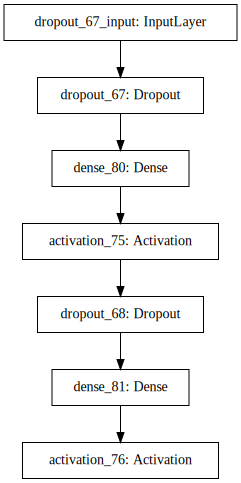

In [161]:
print('Building model...')

from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dropout(0.2, input_shape=(max_words,)))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(lr=0.2, momentum=0.0, decay=0.0, nesterov=False)
adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=adam, 
    metrics=['accuracy']
)

# Plots the model architecture as SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Model training

In this section you'll only need to run the cells, you don't have to modify them!

In [162]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 10182 samples, validate on 1132 samples
Epoch 1/10
10182/10182 [==============================] - 8s 807us/step - loss: 0.7754 - acc: 0.7766 - val_loss: 0.4177 - val_acc: 0.8737
Epoch 2/10
10182/10182 [==============================] - 7s 685us/step - loss: 0.1840 - acc: 0.9473 - val_loss: 0.3904 - val_acc: 0.8860
Epoch 3/10
10182/10182 [==============================] - 7s 674us/step - loss: 0.1172 - acc: 0.9642 - val_loss: 0.4001 - val_acc: 0.8825
Epoch 4/10
 1280/10182 [==>...........................] - ETA: 5s - loss: 0.0560 - acc: 0.987510182/10182 [==============================] - 7s 670us/step - loss: 0.0785 - acc: 0.9755 - val_loss: 0.4624 - val_acc: 0.8754
Epoch 5/10
10182/10182 [==============================] - 7s 665us/step - loss: 0.0752 - acc: 0.9780 - val_loss: 0.4456 - val_acc: 0.8896
Epoch 6/10
10182/10182 [==============================] - 7s 678us/step - loss: 0.0631 - acc: 0.9814 - val_loss: 0.4683 - val_acc: 0.8799
Epoch 7/10
 5504/10182 [===============>

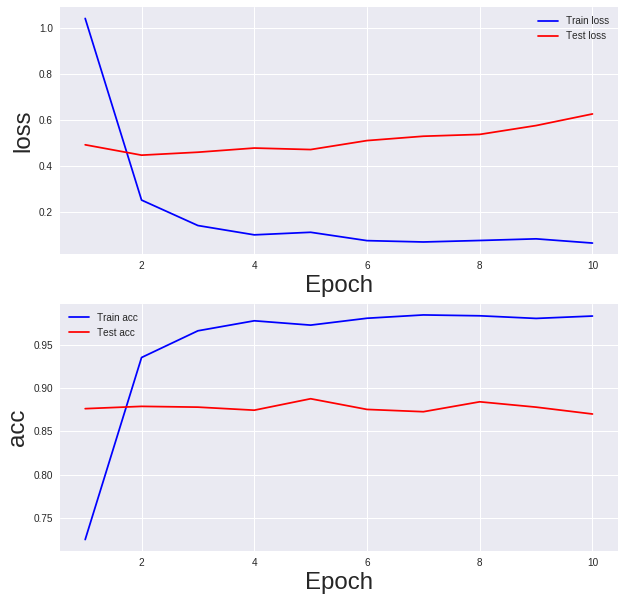

In [144]:
fig = plt.figure(figsize=(10,10))

def plot_history(ax, history, metric):
  rng = list(range(1, epochs + 1))
  m, = ax.plot(rng, history[metric], 'b', label='Train ' + metric)
  val_m, = ax.plot(rng, history['val_' + metric], 'r', label='Test ' + metric)
  ax.legend(handles=[m, val_m])
  
  
  ax.set_xlabel('Epoch', fontsize=24)
  ax.set_ylabel(metric, fontsize=24)  

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

plot_history(ax1, history.history, 'loss')
plot_history(ax2, history.history, 'acc')

# Homework

## Tasks 
Compare the results after performing each of those steps:

1.   Try adding Dropouts to prevent overfitting;
2.   Increase max_words; 2k: 0.; 5k: 0.; 7k: 0.;
3.   Increase number of epochs; 10: 0.
4.   Try using tf-idf vectors instead of BOW; 0.
5.   Increase hidden layer size;
6.   Change hidden layer activations;
7.   Try different optimizers, and change it's learning rates. 